In [2]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('.')

from hea4f3 import Hea4Feature3data

g_calctype="asa"
g_polytype="fcc"

g_hea4 = Hea4Feature3data(g_calctype)

index to delete [14954, 14955, 35634, 35635, 103578, 103579, 119432, 119433, 144840, 144841]
len(bcc) 73494 hen(fcc) 73494


In [2]:
from Common import make_features

g_features = make_features(["basic_mean_std", "basic_min_max",
                            "phys_prop_mean_std", "phys_prop_min_max"])

features
46
['group_mean', 'group_std', 'row_mean', 'group_std', 'group_min', 'group_max', 'row_min', 'group_max', 'X_mean', 'atomic_radius_mean', 'atomic_radius_calculated_mean', 'thermal_conductivity_mean', 'boiling_point_mean', 'melting_point_mean', 'molar_volume_mean', 'log_electrical_resistivity_mean', 'group_std', 'row_std', 'X_std', 'atomic_radius_std', 'atomic_radius_calculated_std', 'thermal_conductivity_std', 'boiling_point_std', 'melting_point_std', 'molar_volume_std', 'log_electrical_resistivity_std', 'group_min', 'row_min', 'X_min', 'atomic_radius_min', 'atomic_radius_calculated_min', 'thermal_conductivity_min', 'boiling_point_min', 'melting_point_min', 'molar_volume_min', 'log_electrical_resistivity_min', 'group_max', 'row_max', 'X_max', 'atomic_radius_max', 'atomic_radius_calculated_max', 'thermal_conductivity_max', 'boiling_point_max', 'melting_point_max', 'molar_volume_max', 'log_electrical_resistivity_max']



In [3]:
from Common import load_save_pickle
status, g_df_calc_polytype_loaded = load_save_pickle("df_extend_{}_{}.pickle".format(g_calctype, g_polytype),
                                                None, action=None)

status, g_df_calc_polytype_loaded.shape

('loaded', (73494, 120))

In [4]:
def add_existend(df, calctype="asa"):
    hea4 = Hea4Feature3data(calctype)
    _df = hea4.add_element_existence_columns(df)
    return _df

g_df_calc_polytype_loaded = add_existend(g_df_calc_polytype_loaded, g_calctype)
g_df_calc_polytype_loaded.shape

index to delete [14954, 14955, 35634, 35635, 103578, 103579, 119432, 119433, 144840, 144841]
len(bcc) 73494 hen(fcc) 73494


(73494, 223)

In [5]:
from pymatgen.core import Element
import pandas as pd
import numpy as np

In [6]:
g_df_moment_zero = g_df_calc_polytype_loaded.query(g_hea4.querystr_by_local_moment())
g_df_moment_nonzero = g_df_calc_polytype_loaded.query(g_hea4.querystr_by_local_moment(add_not=True))

abs(moment1) < 0.01 and abs(moment2) < 0.01 and abs(moment3) < 0.01 and abs(moment4) < 0.01
not (abs(moment1) < 0.01 and abs(moment2) < 0.01 and abs(moment3) < 0.01 and abs(moment4) < 0.01)


In [7]:
def plot_R_mag_nonmag(df_moment_zero, df_moment_nonzero):
    R0 = df_moment_zero['resistivity(micro ohm cm)'].values
    R1 = df_moment_nonzero['resistivity(micro ohm cm)'].values
    Rall = np.hstack([R0,R1])
    print(Rall.min(), Rall.max())
    hist0, bins0 = np.histogram(R0, range=(Rall.min(), Rall.max()), bins=20)
    hist1, bins1 = np.histogram(R1, range=(Rall.min(), Rall.max()), bins=20)
    print(hist0.shape, bins0.shape)
    plt.plot((bins0[1:]+bins0[:-1])*0.5, hist0, label="nonmag")
    plt.plot((bins1[1:]+bins1[:-1])*0.5, hist1, label="mag")
    plt.legend()
    plt.xlabel("R")
    plt.ylabel("occurence")
    plt.show()
    
# plot_R_mag_nonmag(g_df_moment_zero, g_df_moment_nonzero)

In [8]:
g_df_feature_target = g_hea4.add_all_local_moments(g_df_moment_nonzero)

adding moment_H z=1, adding moment_He z=2, adding moment_Li z=3, adding moment_Be z=4, adding moment_B z=5, adding moment_C z=6, adding moment_N z=7, adding moment_O z=8, adding moment_F z=9, adding moment_Ne z=10, adding moment_Na z=11, adding moment_Mg z=12, adding moment_Al z=13, adding moment_Si z=14, adding moment_P z=15, adding moment_S z=16, adding moment_Cl z=17, adding moment_Ar z=18, adding moment_K z=19, adding moment_Ca z=20, adding moment_Sc z=21, adding moment_Ti z=22, adding moment_V z=23, adding moment_Cr z=24, adding moment_Mn z=25, adding moment_Fe z=26, adding moment_Co z=27, adding moment_Ni z=28, adding moment_Cu z=29, adding moment_Zn z=30, adding moment_Ga z=31, adding moment_Ge z=32, adding moment_As z=33, adding moment_Se z=34, adding moment_Br z=35, adding moment_Kr z=36, adding moment_Rb z=37, adding moment_Sr z=38, adding moment_Y z=39, adding moment_Zr z=40, adding moment_Nb z=41, adding moment_Mo z=42, adding moment_Tc z=43, adding moment_Ru z=44, adding m

In [9]:
print(*list(g_df_feature_target.columns))

heakey element1 element2 element3 element4 polytyp ewidth edelt conv lattice constant volume moment1 moment2 moment3 moment4 total moment TC(K) resistivity(micro ohm cm) TE(Ry) material name total magnetic moment per volume group_mean row_mean group1_mean group2_mean group3_mean group4_mean group5_mean group6_mean group7_mean group8_mean group9_mean group10_mean group11_mean group12_mean group13_mean group14_mean group15_mean group16_mean group17_mean group18_mean row1_mean row2_mean row3_mean row4_mean row5_mean row6_mean row7_mean row8_mean row9_mean s1_mean s2_mean p1_mean p2_mean p3_mean p4_mean p5_mean p6_mean d1_mean d2_mean d3_mean d4_mean d5_mean d6_mean d7_mean d8_mean d9_mean d10_mean f1_mean f2_mean f3_mean f4_mean f5_mean f6_mean f7_mean f8_mean f9_mean f10_mean f11_mean f12_mean f13_mean f14_mean X_mean atomic_radius_mean atomic_radius_calculated_mean thermal_conductivity_mean boiling_point_mean melting_point_mean molar_volume_mean log_electrical_resistivity_mean group_std

In [10]:
from Common import make_features

g_features = make_features(["basic_mean_std", "basic_min_max",
                           "row_distribution_mean","ofv_mean"])


features
49
['group_mean', 'group_std', 'row_mean', 'group_std', 'group_min', 'group_max', 'row_min', 'group_max', 'row1_mean', 'row2_mean', 'row3_mean', 'row4_mean', 'row5_mean', 'row6_mean', 'row7_mean', 'row8_mean', 'row9_mean', 's1_mean', 's2_mean', 'p1_mean', 'p2_mean', 'p3_mean', 'p4_mean', 'p5_mean', 'p6_mean', 'd1_mean', 'd2_mean', 'd3_mean', 'd4_mean', 'd5_mean', 'd6_mean', 'd7_mean', 'd8_mean', 'd9_mean', 'd10_mean', 'f1_mean', 'f2_mean', 'f3_mean', 'f4_mean', 'f5_mean', 'f6_mean', 'f7_mean', 'f8_mean', 'f9_mean', 'f10_mean', 'f11_mean', 'f12_mean', 'f13_mean', 'f14_mean']



In [11]:
import random
random.seed(1)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
import numpy as np

In [28]:
from Common import make_descriptor
from Common import reg_Xy_all, reg_Xy_train_test, reg_Xy_kfold
from Common import plot_y_yp
from Common import do_linear_regression, do_linear_regresson_X2, do_linear_regresson_X3,\
                   do_randomforest_regression, do_kneighbors_regression, do_bayselinear_regresson_X2

In [14]:
from PeriodicTable import PeriodicTable
g_ptable = PeriodicTable()

configuration warning: Lr 7p1 (tentative)


In [15]:
g_ptable.df.columns

Index(['symbol', 'row', 'group', 'valence_config', 's1', 's2', 'p1', 'p2',
       'p3', 'p4', 'p5', 'p6', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8',
       'd9', 'd10', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'group1', 'group2', 'group3',
       'group4', 'group5', 'group6', 'group7', 'group8', 'group9', 'group10',
       'group11', 'group12', 'group13', 'group14', 'group15', 'group16',
       'group17', 'group18', 'row1', 'row2', 'row3', 'row4', 'row5', 'row6',
       'row7', 'row8', 'row9'],
      dtype='object')

In [16]:
def make_center_features(groups=["basic"]):
    basic = ["row","group"]
    group_existence = ['group1', 'group2', 'group3',
       'group4', 'group5', 'group6', 'group7', 'group8', 'group9', 'group10',
       'group11', 'group12', 'group13', 'group14', 'group15', 'group16',
       'group17', 'group18', ]
    row_existence = ['row1', 'row2', 'row3', 'row4', 'row5', 'row6',
       'row7', 'row8', 'row9']
    ofv = ['s1', 's2', 'p1', 'p2',
       'p3', 'p4', 'p5', 'p6', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8',
       'd9', 'd10', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', ]
    features = []
    if "basic" in groups:
        features += basic
    if "group_existence" in groups:
        features += group_existence
    if "row_existence" in groups:
        features += row_existence
    if "ofv" in groups:
        features += ofv
    return features

g_center_features = make_center_features(["ofv","row_existence"])
print(*g_center_features)

row1 row2 row3 row4 row5 row6 row7 row8 row9 s1 s2 p1 p2 p3 p4 p5 p6 d1 d2 d3 d4 d5 d6 d7 d8 d9 d10 f1 f2 f3 f4 f5 f6 f7 f8 f9 f10 f11 f12 f13 f14


In [17]:
def make_target_list(df_feature_target, hea4, plot_figure = False):
    
    elements_exist = hea4.get_existing_elements(df_feature_target)
    print(elements_exist)
    target_list = []
    name_list = []
    for target_z in elements_exist:
        elm = Element('H').from_Z(target_z)
        target_element = str(elm)
        name = "moment_{}".format(target_element)
        target_list.append(name)
        name_list.append(target_element)

        _df = df_feature_target[[name]].dropna()
        print(target_z, target_element,"shape", _df.shape)
        if plot_figure:
            _df.hist(name, bins=50)
            plt.show()

    return target_list, name_list

g_target_column_list, g_target_name_list = make_target_list(g_df_feature_target, g_hea4)
print(g_target_column_list, g_target_name_list)

[13 14 21 22 23 24 25 26 27 28 29 30 31 32 39 40 41 42 43 44 45 46 47 48
 49 50 72 73 74 75 76 77 78 79 80 81 82 83]
13 Al shape (1433, 1)
14 Si shape (1719, 1)
21 Sc shape (2099, 1)
22 Ti shape (1448, 1)
23 V shape (1738, 1)
24 Cr shape (4063, 1)
25 Mn shape (5593, 1)
26 Fe shape (6670, 1)
27 Co shape (5914, 1)
28 Ni shape (1440, 1)
29 Cu shape (1320, 1)
30 Zn shape (1319, 1)
31 Ga shape (1667, 1)
32 Ge shape (1945, 1)
39 Y shape (2592, 1)
40 Zr shape (1984, 1)
41 Nb shape (1581, 1)
42 Mo shape (1397, 1)
43 Tc shape (1413, 1)
44 Ru shape (1471, 1)
45 Rh shape (1561, 1)
46 Pd shape (1696, 1)
47 Ag shape (1773, 1)
48 Cd shape (1808, 1)
49 In shape (2137, 1)
50 Sn shape (2231, 1)
72 Hf shape (2237, 1)
73 Ta shape (1641, 1)
74 W shape (1480, 1)
75 Re shape (1485, 1)
76 Os shape (1553, 1)
77 Ir shape (1639, 1)
78 Pt shape (1749, 1)
79 Au shape (1892, 1)
80 Hg shape (2070, 1)
81 Tl shape (2436, 1)
82 Pb shape (2495, 1)
83 Bi shape (2639, 1)
['moment_Al', 'moment_Si', 'moment_Sc', 'moment_Ti

In [18]:
import pickle
%matplotlib inline

def make_df_local_moment(df_feature_target, features, center_features, 
                         target_list, name_list, 
                         ptable=None, unified_target_column="local_moment",
                         filename="df_local_moment.pickle"):
    """make local moment target set

    Args:
        df_feature_target (DataFrame): data
        features (list): a list of feature names
        target_list (str): a list of target columns
        name_list (str): a list of target element names        
        ptable (PeriodicTable, optional): periodic table. Defaults to None

    Returns:
        DataFrame: descriptor and target variable data
    """

    if center_features is not None:
        if ptable is None:
            ptable = PeriodicTable()



    _df_local_moment_list = []
    for target_name, target_column in zip(name_list, target_list):

        features_check = features.copy()
        features_check.append(target_column)
        features_check.append("heakey")

        _df = df_feature_target[features_check].dropna()
        _df.reset_index(drop=True, inplace=True)

        _df[unified_target_column] = _df[target_column]
        del _df[target_column]

        if center_features is not None:
            z = Element(target_name).Z
            _center_feature_values = ptable.df.loc[z, center_features].values

            m = np.repeat(_center_feature_values, _df.shape[0]).reshape(
                len(center_features), _df.shape[0]).T
            _df_center = pd.DataFrame(m, columns=center_features)
            _df_center["element"] = target_name
            _df = pd.concat([_df, _df_center], axis=1)

        _df_local_moment_list.append(_df)

    # merge them all
    _df = pd.concat(_df_local_moment_list, axis=0)

    # use rows which has moment<5
    _df = _df.query("{}<5".format(unified_target_column))

    _df.reset_index(drop=True, inplace=True)

    if filename is not None:
        with open(filename, "wb") as f:
            pickle.dump(_df, f)

    return _df

g_df_local_moment = make_df_local_moment(g_df_feature_target, g_features, g_center_features,
                                         g_target_column_list, g_target_name_list, 
                                         ptable=g_ptable)

In [19]:
g_df_local_moment.reset_index(drop=True, inplace=True)

In [20]:
g_df_local_moment.columns

Index(['group_mean', 'group_std', 'row_mean', 'group_std', 'group_min',
       'group_max', 'row_min', 'group_max', 'row1_mean', 'row2_mean',
       'row3_mean', 'row4_mean', 'row5_mean', 'row6_mean', 'row7_mean',
       'row8_mean', 'row9_mean', 's1_mean', 's2_mean', 'p1_mean', 'p2_mean',
       'p3_mean', 'p4_mean', 'p5_mean', 'p6_mean', 'd1_mean', 'd2_mean',
       'd3_mean', 'd4_mean', 'd5_mean', 'd6_mean', 'd7_mean', 'd8_mean',
       'd9_mean', 'd10_mean', 'f1_mean', 'f2_mean', 'f3_mean', 'f4_mean',
       'f5_mean', 'f6_mean', 'f7_mean', 'f8_mean', 'f9_mean', 'f10_mean',
       'f11_mean', 'f12_mean', 'f13_mean', 'f14_mean', 'heakey',
       'local_moment', 'row1', 'row2', 'row3', 'row4', 'row5', 'row6', 'row7',
       'row8', 'row9', 's1', 's2', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'd1',
       'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'f1', 'f2', 'f3',
       'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14',
       'element'],
      dtype='obje

In [21]:
g_df_local_moment

group_mean  group_std  row_mean  group_std  group_min  group_max  \
0            9.25   4.493050      3.50   4.493050        3.0       14.0   
1            9.50   4.387482      3.50   4.387482        3.0       14.0   
2            9.50   4.153312      3.50   4.153312        4.0       14.0   
3            9.75   3.832427      3.50   3.832427        5.0       14.0   
4           10.00   3.674235      3.50   3.674235        5.0       14.0   
...           ...        ...       ...        ...        ...        ...   
83189       10.50   4.387482      5.25   4.387482        4.0       15.0   
83190        8.25   4.322904      5.50   4.322904        4.0       15.0   
83191        8.50   4.153312      5.50   4.153312        4.0       15.0   
83192       10.75   4.023369      5.50   4.023369        5.0       15.0   
83193       10.25   4.023369      5.50   4.023369        4.0       15.0   

       row_min  group_max  row1_mean  row2_mean  ...  f6  f7  f8  f9  f10  \
0          3.0       14.0        0.0        0.0  ...   0   0   0   0    0   
1          3.0       14.0        0.0        0.0  ...   0   0   0   0    0   
2          3.0       14.0        0.0        0.0  ...   0   0   0   0    0   
3          3.0       14.0        0.0        0.0  ...   0   0   0   0    0   
4          3.0       14.0        0.0        0.0  ...   0   0   0   0    0   
...        ...        ...        ...        ...  ...  ..  ..  ..  ..  ...   
83189      4.0       15.0        0.0        0.0  ...   0   0   0   0    0   
83190      4.0       15.0        0.0        0.0  ...   0   0   0   0    0   
83191      4.0       15.0        0.0        0.0  ...   0   0   0   0    0   
83192      4.0       15.0        0.0        0.0  ...   0   0   0   0    0   
83193      5.0       15.0        0.0        0.0  ...   0   0   0   0    0   

       f11  f12  f13  f14  element  
0        0    0    0    0       Al  
1        0    0    0    0       Al  
2        0    0    0    0       Al  
3        0    0    0    0       Al  
4        0    0    0    0       Al  
...    ...  ...  ...  ...      ...  
83189    0    0    0    1       Bi  
83190    0    0    0    1       Bi  
83191    0    0    0    1       Bi  
83192    0    0    0    1       Bi  
83193    0    0    0    1       Bi  

[83194 rows x 93 columns]

In [22]:
# set descriptor and target variable

import copy
g_all_features = copy.deepcopy(g_center_features)
g_all_features.extend(g_features)
g_all_features

g_target = "local_moment"

local_moment mean 0.8765677306055726


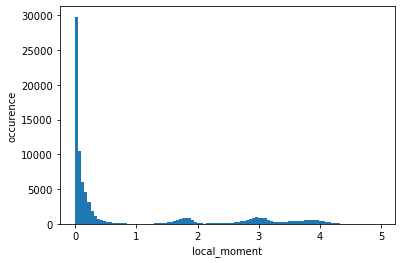

In [23]:
print(g_target,"mean",g_df_local_moment[g_target].values.mean())
plt.hist(g_df_local_moment[g_target].values, bins=100)
plt.xlabel(g_target)
plt.ylabel("occurence")
plt.show()

In [24]:
def make_scaler_ml(df_local_moment, all_features, target,
                   transform="PCA", n_components=2):
    X_ = df_local_moment.loc[:, all_features].astype(float).values
    y_ = df_local_moment[[target]].astype(float).values
    Xscaler = StandardScaler()
    Xscaler.fit(X_)
    yscaler = MinMaxScaler()
    yscaler.fit(y_)
    
    X = Xscaler.transform(X_)
    
    if transform == "PCA":
        ml = PCA(n_components=n_components)
        ml.fit(X)
        print("n {}, explained_variance ratio {}".format(n_components,
                                np.sum(ml.explained_variance_ratio_)))
        ml.fit(X)
    elif transform == "Isomap":
        ml = Isomap(n_components=n_components)
    else:
        errror_msg = "unknown transform".format(transform)
        print(errror_msg)
        raise ValueError(errror_msg)    
    return Xscaler, yscaler, ml

n 2, explained_variance ratio 0.25292171622646376
V


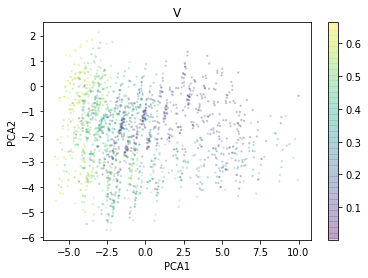

Cr


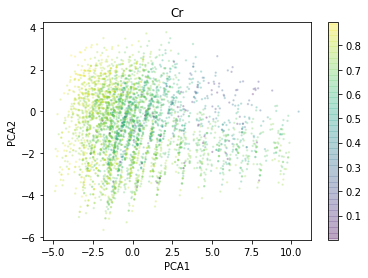

Mn


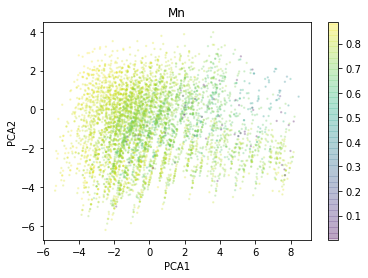

Fe


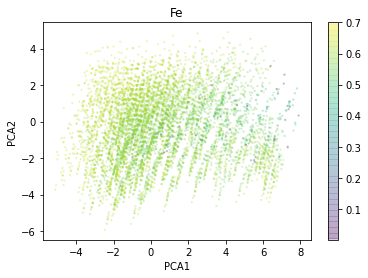

Ni


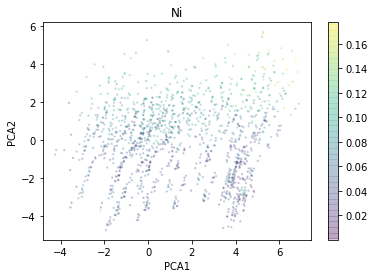

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

def plot_pca(df_local_moment, all_features, target,
             Xscaler, yscaler, ml, 
             title=None, alpha=0.2):
    X_ = df_local_moment.loc[:, all_features].astype(float).values
    y_ = df_local_moment[[target]].astype(float).values

    X = Xscaler.transform(X_)
    y = yscaler.transform(y_).reshape(-1)
    X2 = ml.transform(X)
   
    if title is not None:
        plt.title(title)
    scatter_plot = plt.scatter(X2[:,0],X2[:,1], c=y, s=2, alpha=alpha)
    plt.colorbar(scatter_plot)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()
    
g_Xscaer, g_yscaler, g_ml = \
    make_scaler_ml(g_df_local_moment,
                   g_all_features, g_target)
    
for key in ["V","Cr","Mn","Fe","Ni"]:
    print(key)
    plot_pca(g_df_local_moment.query('element=="{}"'.format(key)),
             g_all_features, g_target,
             g_Xscaer, g_yscaler, g_ml, 
             title=key)
    

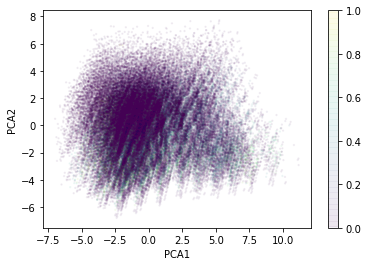

In [26]:
plot_pca(g_df_local_moment, g_all_features, g_target,
                     g_Xscaer, g_yscaler, g_ml,
        alpha =0.05)

(83194, 53)
0 R2 0.02610496938064366
1 R2 0.02126825036841795
2 R2 0.022473938321764253
3 R2 0.02133557119979601
4 R2 0.021910734765368423
5 R2 0.025609008729635785
6 R2 0.02300721792331295
7 R2 0.023971585831155218
8 R2 0.022801190032543328
9 R2 0.02854733374127194
number of test data (83194,)
plot_type ['plt_simple']


/home/kino/work/00_HEA/hea4_regression/Common.py:363: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/linear_regression,_X1,__kfold,local_moment.png
(83194, 106)
0 R2 0.026291764035974996
1 R2 0.0233051658717639
2 R2 0.02429441285486189
3 R2 0.022365821658396512
4 R2 0.022503561840630848
5 R2 0.027658590650517123
6 R2 0.025800858037439922
7 R2 0.024423533603999736
8 R2 0.024619313310777935
9 R2 0.029354369295822802
number of test data (83194,)
plot_type ['plt_simple']


/home/kino/work/00_HEA/hea4_regression/Common.py:363: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/linear_regression,_X1_X2,__kfold,local_moment.png
(83194, 212)
0 R2 0.026207764351899088
1 R2 0.023593503064750276
2 R2 0.024981647588437683
3 R2 0.022020528062153932
4 R2 0.022451212115946917
5 R2 0.026686256534093955
6 R2 0.025753382010173853
7 R2 0.023815899200332447
8 R2 0.024396952229426172
9 R2 0.029916472555711393


/home/kino/work/00_HEA/hea4_regression/Common.py:363: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


number of test data (83194,)
plot_type ['plt_simple']
image saved:  images/linear_regression,_X1_X2_X3,__kfold,local_moment.png
(83194, 106)
0 R2 0.026739510275044842
1 R2 0.023367696653512904
2 R2 0.02411594984232368
3 R2 0.0224717906837143
4 R2 0.022918700294142336
5 R2 0.027905068578966685
6 R2 0.025578921013567735
7 R2 0.02439392654176875
8 R2 0.02467108404888807
9 R2 0.029255492179715015
number of test data (83194,)
plot_type ['plt_simple']


/home/kino/work/00_HEA/hea4_regression/Common.py:363: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/Bayesian_linear_regression,_X1_X2,__kfold,local_moment.png
(83194, 53)
0 R2 -0.43029207605169617
1 R2 -0.42354361537123575
2 R2 -0.44134930975214126
3 R2 -0.42745762900886164
4 R2 -0.4279557588843683
5 R2 -0.4221074290451894
6 R2 -0.4300182199683309
7 R2 -0.43541358036524347
8 R2 -0.43716406794501084
9 R2 -0.4233609884838818
number of test data (83194,)
plot_type ['plt_simple']


/home/kino/work/00_HEA/hea4_regression/Common.py:363: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/random_forest_regression,_X1,__kfold,local_moment.png
(83194, 53)
0 R2 0.01169828036866305
1 R2 0.007755374862274955
2 R2 0.009532263665253726
3 R2 0.008098034566010104
4 R2 0.006250669368224049
5 R2 0.012305319895386413
6 R2 0.009214306168516817
7 R2 0.005953652080468941
8 R2 0.009654559435020804
9 R2 0.012774013492182545
number of test data (83194,)
plot_type ['plt_simple']


/home/kino/work/00_HEA/hea4_regression/Common.py:363: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/k_neighbors_regression,_X1,__kfold,local_moment.png
kneighbors result {'k neighbors regression, X1,  kfold': {'r2': 0.00932364739020014, 'mae': 1.1221025924302788, 'rmse': 1.3171142636969986}}


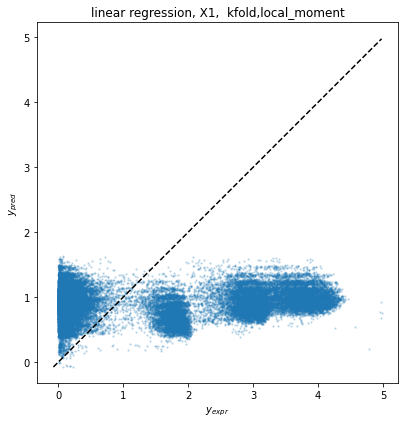

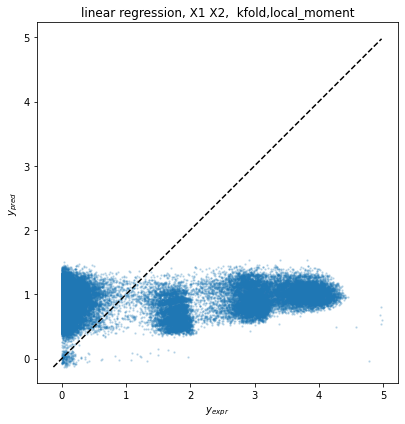

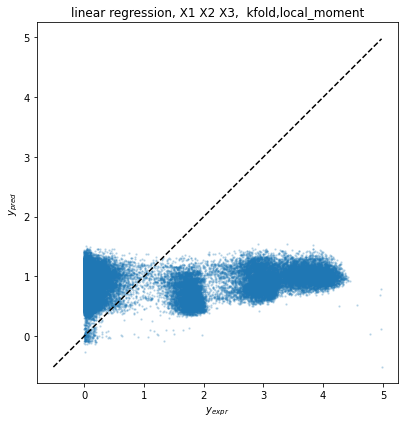

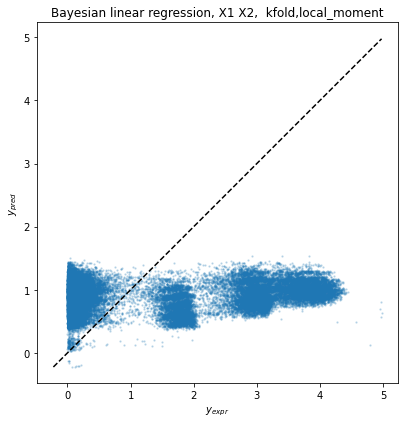

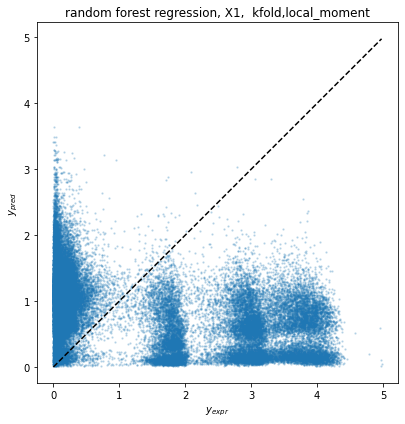

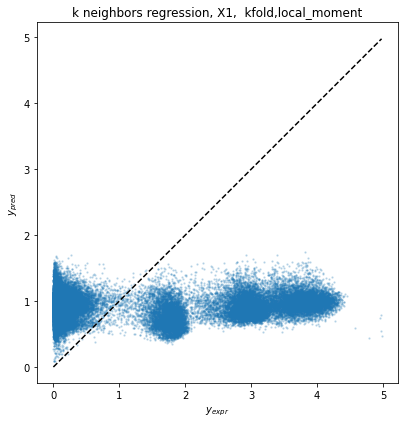

In [29]:
def all_regression(df, features, center_features, target_column="local_moment", 
                   ptable=None, doit=["linear", "bayselinear", "randomforest","kneighbors"]):
    """execute all the regression and make resulting dict

    Args:
        df_feature_target (DataFrame): data
        features (list): a list of feature names
        target_list (str): a name of target variable

    Returns:
        dict: R2 results for all the regressions.
    """
    result_dic_all = {}
    for target_column in [target_column]:
        result_dic_all[target_column] = {}
        
    _df = df
    target_name = target_column
    
    if "linear" in doit:
        result = do_linear_regression(_df, features, target_name)
        result_dic_all[target_name].update(result)
        result = do_linear_regresson_X2(_df, features, target_name)
        result_dic_all[target_name].update(result)
        result = do_linear_regresson_X3(_df, features, target_name)
        result_dic_all[target_name].update(result)            
    if "bayselinear" in doit:
        result = do_bayselinear_regresson_X2(_df, features, target_name)
        result_dic_all[target_name].update(result)
    if "randomforest" in doit:
        result = do_randomforest_regression(_df, features, target_name)
        result_dic_all[target_name].update(result)
    if "kneighbors" in doit:
        result = do_kneighbors_regression(_df, features, target_name)
        print("kneighbors result", result)
        result_dic_all[target_name].update(result)    

    return result_dic_all

g_result_dic_all = all_regression(g_df_local_moment, g_features,  g_center_features)

In [30]:
def result_to_df(result_dic_all):
    score_list = []
    for target in result_dic_all.keys():
        reg_method_dic = result_dic_all[target]
        for reg_method in reg_method_dic:
            # print(reg_method_dic[reg_method])
            score_dic = reg_method_dic[reg_method]
            for score in score_dic:
                score_list.append([target,reg_method,score,score_dic[score]])
    _df = pd.DataFrame(score_list,
                       columns=['target','reg_method','score_metric','score'])
    #_df.set_index(keys=['reg_method','target','score_metric'], inplace=True)
    return _df
def make_df_for_plot(df_score, score_metric="r2"):
    target_list = np.unique(df_score["target"].values)
    df_1 = df_score.query("score_metric=='{}'".format(score_metric))
    del df_1["score_metric"]

    df_2 = df_1.set_index(["target","reg_method"])
    df_3_list = []
    for target in g_target_list:
        df_3 = df_2.loc[target,:]
        df_3.columns=[target]
        df_3_list.append(df_3)
    df_4 = pd.concat(df_3_list, axis=1)
    return df_4

g_df_score_raw = result_to_df(g_result_dic_all)

score_metric = "r2"
g_df_r2 = g_df_score_raw.query("score_metric=='{}'".format(score_metric))
del g_df_r2["target"]
del g_df_r2["score_metric"]
g_df_r2.set_index("reg_method", drop=True, inplace=True)
display(g_df_r2)


score
reg_method                                         
linear regression, X1,  kfold              0.023703
linear regression, X1 X2,  kfold           0.025062
linear regression, X1 X2 X3,  kfold        0.024982
Bayesian linear regression, X1 X2,  kfold  0.025142
random forest regression, X1,  kfold      -0.429866
k neighbors regression, X1,  kfold         0.009324

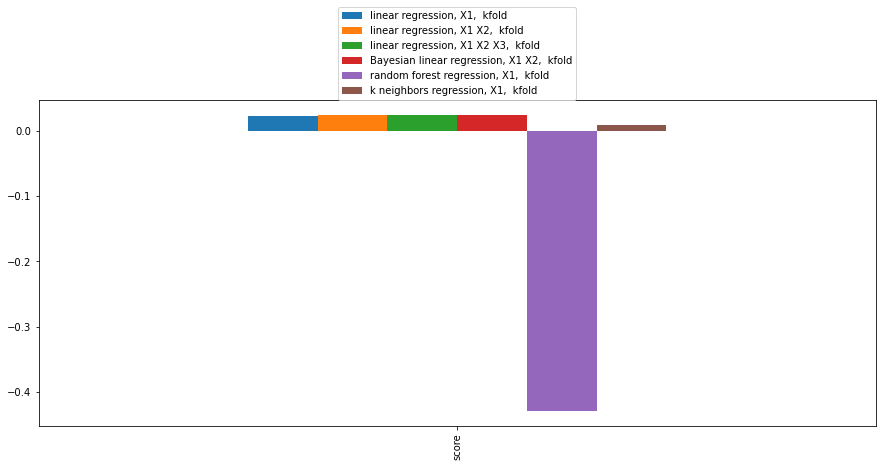

In [31]:
figsize = (15,6)
df = g_df_r2.T.plot.bar(figsize=figsize)
plt.legend(loc='upper center' , bbox_to_anchor=(0.5, 1.3))
plt.xticks(rotation=90)
# plt.ylim((0,0.4))
plt.show()